<a href="https://colab.research.google.com/github/NjokiMbugua/Human-Resource-Case-Study/blob/main/Leah_Mbugua_Case_study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What makes employees quit an organization**

The objective of this study is to determine what makes an employee to leave an organization.


## Specific Objectives


a)  To determine the effect of the number working hours on attrition rate

b)  To examine how salary level influences attrition

c)  To examine whether the number of projects an employeee is working on influences attrition

d)  To determine the relationship between promotions and attrition rate

e)  Identify the top most factors that affected employee attrition



#Importing the Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Reading the data

In [17]:
# Loading the dataset
hr = pd.read_csv('/content/HR_comma_sep (1) (1).csv')
hr.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#Checking the datasets

In [18]:
# Checking the datatypes
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [19]:
# Getting information about the datatypes
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [20]:
# Summary statistics of the dataset
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Data Cleaning

In [21]:
# Checking for missing values
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [22]:
# Checking for duplicates
hr.duplicated().sum()

3008

Since this is a human resource record, the duplicates could be due to similar records such as employees earning same salary, the number of years a person has worked in the company, or even the number of projects an individual has worked on. 

In [23]:
# Checking for unique values

for column in hr.columns:
  print(column)
  print(hr[column].unique())
  print('\n')
  print(hr[column].nunique())

satisfaction_level
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]


92
last_evaluation
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]


65
number_project
[2 5 7 6 4 3]


6
average_montly_hours
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 1

In [24]:
# Renaming the sales column
hr.rename(columns = {'sales':'department'}, inplace = True)

# Exploratory Data Analysis

In [25]:
hr.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


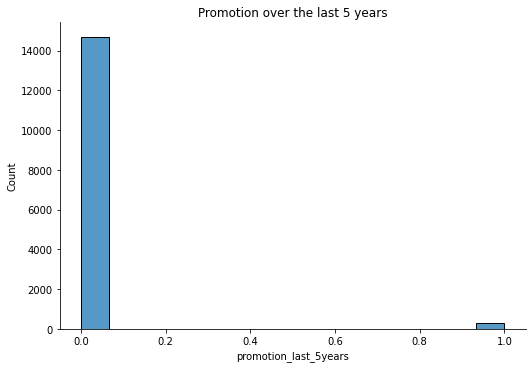

In [60]:
# Looking at the distribution the of promotion over the five years


sns.displot(x='promotion_last_5years', data=hr, kde=False, height=5,aspect=1.5)
plt.title('Promotion over the last 5 years')
plt.show()



Only a very minute percentage received a promotion over the past five years.

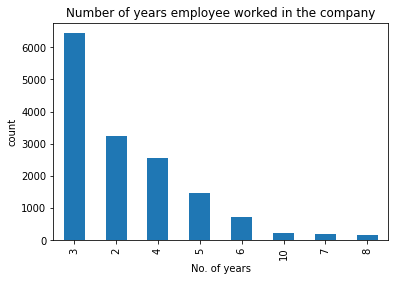

In [47]:
# Number of years worked in the company
hr['time_spend_company'].value_counts().plot(kind='bar')
plt.title('Number of years employee worked in the company')
plt.xlabel('No. of years')
plt.ylabel('count')
plt.show()

Majority of the employees worked in the company for three years.

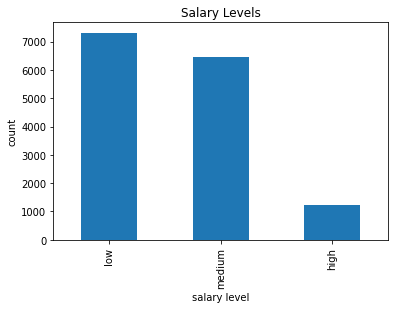

In [49]:
# Bar graph showing each salary level
hr['salary'].value_counts().plot(kind='bar')
plt.title('Salary Levels')
plt.xlabel('salary level')
plt.ylabel('count')
plt.show()


From the bar graph it is evident that majority of the employees were earning a low salary with only a fraction of the workforce pocketing a high salary.

In [46]:
hr.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


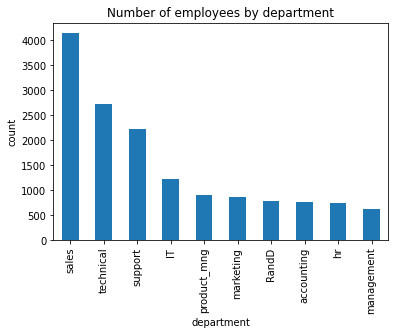

In [64]:
# Looking at different departments
hr['department'].value_counts().plot(kind='bar')
plt.title('Number of employees by department')
plt.xlabel('department')
plt.ylabel('count')
plt.show()

The sales department had the highest number of employees followed closely by the technical department while the management team had the least number of employees.

Text(0, 0.5, 'count')

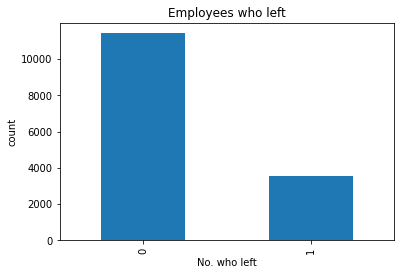

In [44]:
# The number of employees who left
hr['left'].value_counts().plot(kind='bar')
plt.title('Employees who left')
plt.xlabel('No. who left')
plt.ylabel('count')


The number of employees who left is much lower than the number of those who stayed in the company.

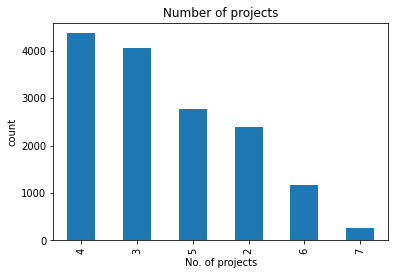

In [45]:
# Visualizing the number of projects
hr['number_project'].value_counts().plot(kind='bar')
plt.title('Number of projects')
plt.xlabel('No. of projects')
plt.ylabel('count')
plt.show()

Majority of the employees were working on four projects with a small percentage handling seven projects.

<function matplotlib.pyplot.show(*args, **kw)>

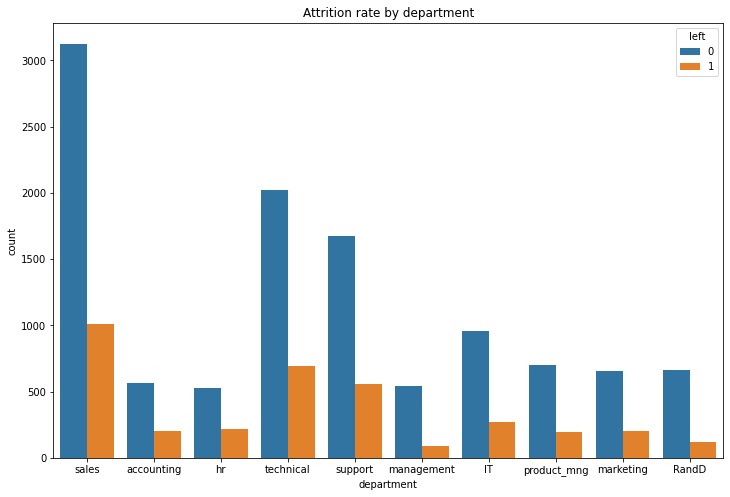

In [63]:
# Showing attrition rate by departments

from IPython.core.pylabtools import figsize
fig,ax=plt.subplots(figsize=(12,8))

sns.countplot(x='department', hue = 'left', data = hr)
plt.title('Attrition rate by department')
plt.show

The departments with high attrition rates are sales, technical and support. Although, they are also the departments with the highest number of staff.

In [65]:
hr.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


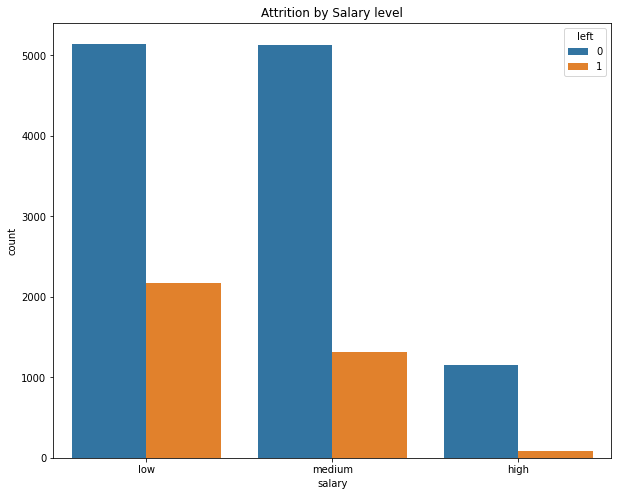

In [61]:
# Relashionship between salary and attrition

fig,ax=plt.subplots(figsize=(10,8))

sns.countplot(x='salary',hue='left', data=hr)
plt.title('Attrition by Salary level')
plt.show()

There was a high attrition rate for the job group with the lowest salary.

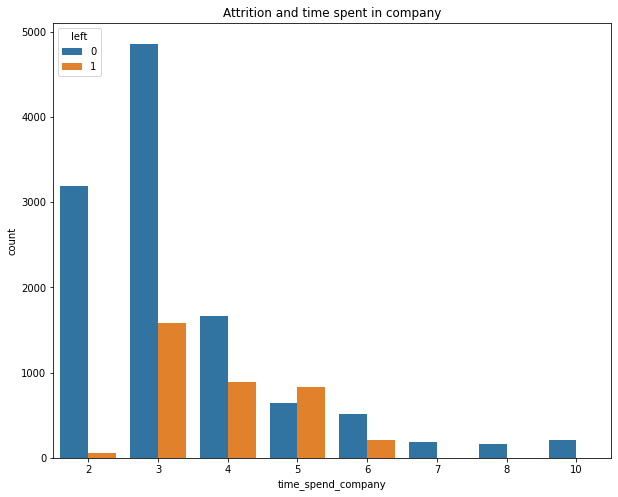

In [66]:
# Relationship between time spent in the company and attrition
fig,ax=plt.subplots(figsize=(10,8))

sns.countplot(x='time_spend_company', hue='left', data=hr)
plt.title('Attrition and time spent in company')
plt.show()

Most employs are leaving the company at the 5th year mark.

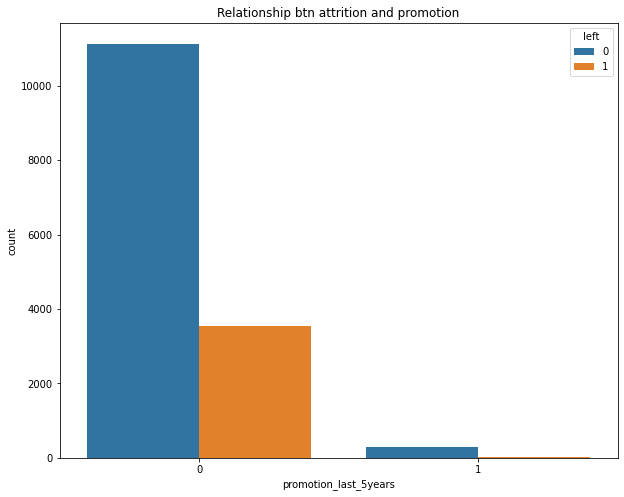

In [67]:
# Relationship between promotion and attrition
fig,ax=plt.subplots(figsize=(10,8))

sns.countplot(x='promotion_last_5years', hue='left', data=hr)
plt.title('Relationship btn attrition and promotion')
plt.show()

Promotions have not been frequent in the company within the last five years and from a glance they do not seem to inluence the decision of the employees that much.

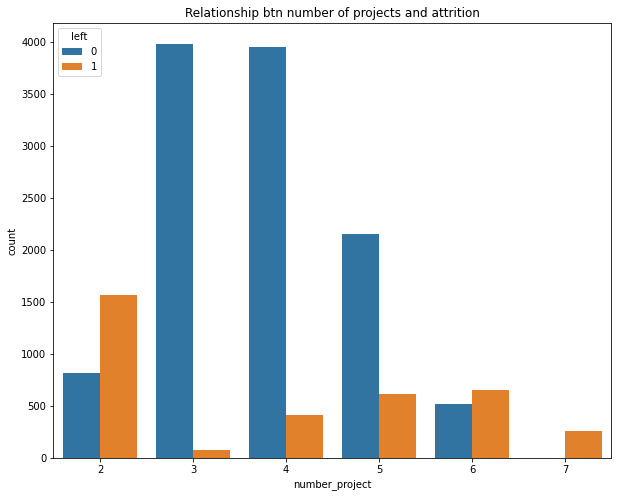

In [93]:
# Relationship between number of projects and attrition
fig,ax=plt.subplots(figsize=(10,8))

sns.countplot(x='number_project', hue='left', data=hr)
plt.title('Relationship btn number of projects and attrition')
plt.show()

Employees with more than five projects are leaving the company at a high rate which could be due to work related stress. There is also high rate of attrition for employees handling two projects which maybe could be attributed to dissastifaction and the feeling of being level out or not being a chance to utilize their skills. We see a very low level of attrition for individuals handling three projects;maybe because they are able to strike a life-work balance as they do not have much to handle and are also not underworked.

In [41]:
hr.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


# Modeling

## Using logistic regression to predict attrition

In [69]:
# First we label encode the string variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

hr[['department']] = hr[['department']].apply(LabelEncoder().fit_transform)
hr[['salary']] = hr[['salary']].apply(LabelEncoder().fit_transform)

In [70]:
# Viewing the dataframe
hr.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2


In [77]:
# Getting the features and the labels
X= hr.drop('left', axis=1)
y= hr.left.values

In [78]:
# Splitting the data into train and test using 80:20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [79]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
# Fitting the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [82]:
# Predicting
y_pred_log = log_reg.predict(X_test)
y_pred_log


array([0, 0, 0, ..., 0, 0, 0])

In [83]:
# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_log))
print(accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


[[2092  170]
 [ 553  185]]
0.759
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2262
           1       0.52      0.25      0.34       738

    accuracy                           0.76      3000
   macro avg       0.66      0.59      0.60      3000
weighted avg       0.72      0.76      0.73      3000



The model achieved an accuracy of 76% and 79% precision which means that according to the prediction the probability of an employee leaving the company is 0.79. 





## Using Random Forest to make the prediction

In [85]:
# Using random forest to predict 
from sklearn.ensemble import RandomForestClassifier

# Fitting into the classifier
rf = RandomForestClassifier(max_depth = 3, min_samples_split=10, n_estimators=300, criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=10,
                       n_estimators=300)

In [89]:
# Get the predictions
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print('\n')
print('Accuracy of random Forest:', accuracy_score(y_test, y_pred_rf))
print('\n')
print(classification_report(y_test, y_pred_rf))

[[2239   23]
 [ 260  478]]


Accuracy of random Forest: 0.9056666666666666


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2262
           1       0.95      0.65      0.77       738

    accuracy                           0.91      3000
   macro avg       0.93      0.82      0.86      3000
weighted avg       0.91      0.91      0.90      3000



After using random forest to predict the attrition, we achieve 90 % accuracy. So Random forest is better suited for the task in comparison with Logistic regression.

## Determining the most important features

In [92]:
# Determining feature importance
importances = list(rf.feature_importances_)

test_features = hr.columns.to_list()
test_features.remove('left')

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

# Sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('satisfaction_level', 0.3983), ('last_evaluation', 0.0745), ('number_project', 0.178), ('average_montly_hours', 0.1205), ('time_spend_company', 0.22), ('Work_accident', 0.0062), ('promotion_last_5years', 0.0), ('department', 0.0003), ('salary', 0.0023)]

Variable: satisfaction_level   Importance: 0.3983
Variable: time_spend_company   Importance: 0.22
Variable: number_project       Importance: 0.178
Variable: average_montly_hours Importance: 0.1205
Variable: last_evaluation      Importance: 0.0745
Variable: Work_accident        Importance: 0.0062
Variable: salary               Importance: 0.0023
Variable: department           Importance: 0.0003
Variable: promotion_last_5years Importance: 0.0


The top most features that influence employee attrition rate include:


*   satisfaction level
*   time spent in the company which translates to the number of years an individual has worked in the company
*   number of projects an individual is working on
*   average monthly hours the individual inputs into their projects.





# Deductions
**bold text**

From the analysis we deduce the following:

1) Promotion has not been a common occurence in the company over the five years.

2) Majority of the staff have been in employment for 3-5 years.

3) Most of the employees are earning low to medium salary with very few earning a high salary.

4) The sales, technical and support departments have the most number of staff.

5) The number of employees that leave the company is much lower than those that stayed.

6) Most of the employees were handling 3-5 projects.

7) There was very low rate of attrition for employees with high salary.

8) Most stafff left the company when they hit the fifth year.

9) Employees with more than five projects were leaving the company at a high rate. There is also high rate of attrition for employees handling only two projects. Those handling between 3-4 projects had a very low attrition rate

10) The factors that influenced whether an employee left the company include satisfaction level, time spent in the company which translates to the number of years an individual has worked in the company, number of projects an individual is working on and average monthly hours the individual inputs into their projects.
